# Understanding the Dataset
---

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df_rc = df.shape

print("Number of attributes: ", df_rc[1])
print("Number of rows: ", df_rc[0])

Number of attributes:  35
Number of rows:  1470


**Column wise statistics**

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Number of missing values in the dataset**

In [5]:
# df.isnull().summ() gives per column basis null count
df.isnull().sum().sum()

0

**Number of duplicate values in the dataset**

In [6]:
df.duplicated().sum()

0

# Data Cleaning
---

## Creating dictionary of column attributes

In [7]:
class Column:
    def __init__(self, name, datatype, unique_cnt):
        self.name = name
        self.datatype = datatype
        self.unique_cnt = unique_cnt
    def print_info(self):
        print('name:', self.name)
        print('data-type:', self.datatype)
        print('uniqes:', self.unique_cnt)
        print('---------')

non_num_cols = []

for non_num_col in df.select_dtypes(exclude='number').columns:
    if non_num_col != 'Attrition':
        non_num_cols.append(Column(non_num_col, df[non_num_col].dtype, df[non_num_col].nunique()))

print('Total Columns Scanned:', len(non_num_cols))
for col in non_num_cols:
    col.print_info()

Total Columns Scanned: 8
name: BusinessTravel
data-type: object
uniqes: 3
---------
name: Department
data-type: object
uniqes: 3
---------
name: EducationField
data-type: object
uniqes: 6
---------
name: Gender
data-type: object
uniqes: 2
---------
name: JobRole
data-type: object
uniqes: 9
---------
name: MaritalStatus
data-type: object
uniqes: 3
---------
name: Over18
data-type: object
uniqes: 1
---------
name: OverTime
data-type: object
uniqes: 2
---------


**1. Replace the missings with the corresponding column's mean for numerics and mode for non-numerics**

In [8]:
if df.isnull().sum().sum() > 0:
    df.fillna(df.mean(numeric_only=True), inplace=True) # Columns with numeric data only
    for col in non_num_cols:
        df[col.name].fillna(df[col.name].mode()[0], inplace=True)

**2. Remove duplicated values in the dataset**

In [9]:
df[df.duplicated(keep=False)]

if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)

**3. If any row in the target column (Attrition) is missing, you must drop
that row**

In [10]:
df.dropna(subset=['Attrition'], inplace=True)

# Creation of input and output features
---

In [11]:
features = df.drop(columns='Attrition', axis=1)
labels = df['Attrition'].copy()

In [12]:
features

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [13]:
labels

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

# Conversion of features into numeric values
---

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() # Numeric increment of labels, automatic detection of unique data in the column

## *Features* Non-numeric conversion to numeric

**Label Encoding**

In [15]:
for col in non_num_cols:
    if col.unique_cnt <= 2:
        features[col.name] = encoder.fit_transform(features[col.name])
    else:
        features[col.name] = features[col.name].astype('category')

In [16]:
features.shape

(1470, 34)

**One-Hot Encoding**

In [17]:
# One hot encoding
features = pd.get_dummies(features)

In [18]:
features.shape

(1470, 53)

## **Labels** Non-numeric conversion to numeric
For the target column, label-encoding is okay

In [19]:
# if contains_non_numeric(labels):
#     if labels.nunique() <= 2:
#         labels = encoder.fit_transform(labels)
#     else:
#         labels = pd.get_dummies(labels)
# labels

labels = encoder.fit_transform(labels)
labels

array([1, 0, 1, ..., 0, 0, 0])

# Scaling of the features
---

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [21]:
def data_scaling(data, scale_type = 'minmax'):
    if scale_type == 'minmax':
        scaler = MinMaxScaler()
        return scaler.fit_transform(data)
    else:
        scaler = StandardScaler()
        return scaler.fit_transform(data)

**Features** - Columns that are used for one-hot encoding would not be scaled

In [22]:
not_one_hot_cols = []

for key, values in features.items():
    if key not in [col.name for col in non_num_cols if col.unique_cnt > 2]:
        not_one_hot_cols.append(key)

len(not_one_hot_cols)
# Another way: one_hot_cols = features.select_dtypes(include='bool').columns

53

**MinMax Scaling**

In [23]:
features_minmax = features.copy()
for col in not_one_hot_cols:
    features_minmax[col] = data_scaling(features[[col]], 'minmax')

features_minmax

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.0,0.914286,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,1.0,0.442857,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,1.0,0.885714,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.0,0.371429,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,1.0,0.142857,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.0,0.996613,0.666667,1.0,0.157143,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.500000,0.365784,0.178571,0.00,0.0,0.997097,1.000000,1.0,0.171429,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.214286,0.037938,0.107143,0.50,0.0,0.998065,0.333333,1.0,0.814286,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.738095,0.659270,0.035714,0.50,0.0,0.998549,1.000000,1.0,0.471429,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


**Standard Scaling**

In [24]:
features_standard = features.copy()
for col in not_one_hot_cols:
    features_standard[col] = data_scaling(features[[col]], 'standard')

features_standard

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,-1.224745,1.383138,0.379672,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,0.816497,-0.240677,-1.026167,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,0.816497,1.284725,-1.026167,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-1.224745,-0.486709,0.379672,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,0.816497,-1.274014,0.379672,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.0,1.721670,0.254625,0.816497,-1.224807,1.785511,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
1466,0.227347,-0.469754,-0.393938,-1.868426,0.0,1.723332,1.169781,0.816497,-1.175601,-1.026167,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
1467,-1.086676,-1.605183,-0.640727,0.085049,0.0,1.726655,-0.660531,0.816497,1.038693,1.785511,...,-0.462464,-0.273059,3.022901,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
1468,1.322365,0.546677,-0.887515,0.085049,0.0,1.728317,1.169781,0.816497,-0.142264,-1.026167,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565


# Correlation Analysis
---
Scaling methods like Min-Max Scaling and Standard Scaling do not affect the correlation coefficients because correlation measures the relative strength of linear relationships, which is invariant to changes in scale. However, proper scaling is essential for many machine learning algorithms to perform optimally and to ensure that all features contribute equally to the model training process.

## Correlation of every column with the target column
The features are already in df format, take labels into df format too

In [25]:
labels = pd.DataFrame(labels, columns=['Attrition'])
labels['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Remove columns with no-variance
They have no contribution to the correlation

In [26]:
# Check for columns with constant values
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print('Columns with no-variance:', constant_columns)

Columns with no-variance: ['EmployeeCount', 'Over18', 'StandardHours']


**Minmax Scaled Data**

In [27]:
features_minmax.drop(constant_columns, axis=1, inplace=True)

In [28]:
corr_minmax_series = features_minmax.corrwith(labels['Attrition']) # Type: Panda Series
corr_minmax_series

Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
Gender                               0.029453
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
OverTime                             0.246118
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StockOptionLevel                    -0.137145
TotalWorkingYears                   -0.171063
TrainingTimesLastYear               -0.059478
WorkLifeBalance                   

**Standard Scaled Data**

In [29]:
features_standard.drop(constant_columns, axis=1, inplace=True)

In [30]:
corr_standard_series = features_standard.corrwith(labels['Attrition'])
corr_standard_series

Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
Gender                               0.029453
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
OverTime                             0.246118
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StockOptionLevel                    -0.137145
TotalWorkingYears                   -0.171063
TrainingTimesLastYear               -0.059478
WorkLifeBalance                   

## Correlation Matrix

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_barchart(corr_with_target_df):
    # Plotting using Matplotlib
    plt.figure(figsize=(15, 6))
    plt.bar(corr_with_target_df['Feature'], corr_with_target_df['Correlation'].abs(), color='skyblue')
    plt.xlabel('Features')
    plt.ylabel('Correlation with Attrition')
    plt.title('Correlation of Features with Attrition')
    plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels to vertical
    plt.tight_layout()  # Adjust the layout to prevent cutting off labels
    plt.show()

def plot_heatmap(features, title):
    plt.figure(figsize=(15, 10))
    sns.heatmap(features, annot=True, cmap='mako')
    plt.title(title)
    plt.show()

## Top-20 correlations
Both give same correlations

### MinMax Scaled Data

In [32]:
top_corr_minmax_series = corr_minmax_series.abs().sort_values(ascending=False)[:20]
top_corr_minmax_series

OverTime                             0.246118
MaritalStatus_Single                 0.175419
TotalWorkingYears                    0.171063
JobLevel                             0.169105
YearsInCurrentRole                   0.160545
MonthlyIncome                        0.159840
Age                                  0.159205
JobRole_Sales Representative         0.157234
YearsWithCurrManager                 0.156199
StockOptionLevel                     0.137145
YearsAtCompany                       0.134392
JobInvolvement                       0.130016
BusinessTravel_Travel_Frequently     0.115143
JobSatisfaction                      0.103481
EnvironmentSatisfaction              0.103369
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married                0.090984
JobRole_Research Director            0.088870
MaritalStatus_Divorced               0.087716
Department_Research & Development    0.085293
dtype: float64

### Standard Scaled Data

In [33]:
top_corr_standard_series = corr_minmax_series.abs().sort_values(ascending=False)[:20]
top_corr_standard_series

OverTime                             0.246118
MaritalStatus_Single                 0.175419
TotalWorkingYears                    0.171063
JobLevel                             0.169105
YearsInCurrentRole                   0.160545
MonthlyIncome                        0.159840
Age                                  0.159205
JobRole_Sales Representative         0.157234
YearsWithCurrManager                 0.156199
StockOptionLevel                     0.137145
YearsAtCompany                       0.134392
JobInvolvement                       0.130016
BusinessTravel_Travel_Frequently     0.115143
JobSatisfaction                      0.103481
EnvironmentSatisfaction              0.103369
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married                0.090984
JobRole_Research Director            0.088870
MaritalStatus_Divorced               0.087716
Department_Research & Development    0.085293
dtype: float64

### MinMax Scaled Data

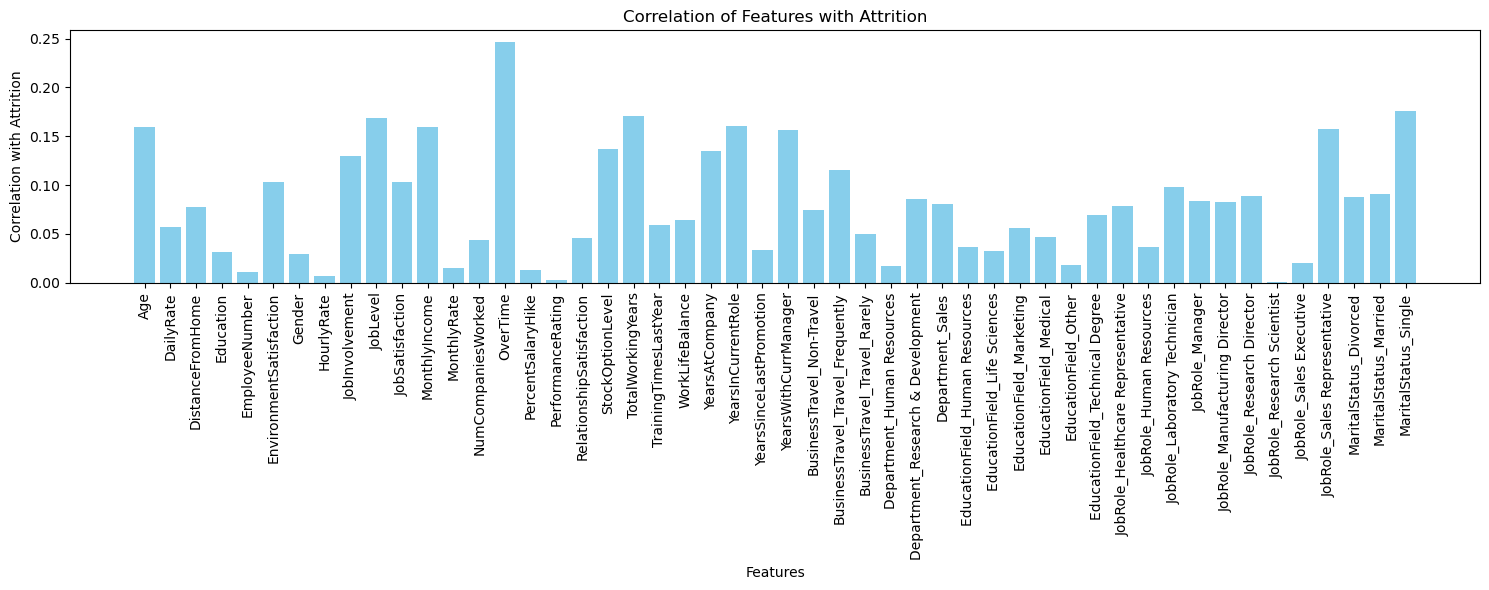

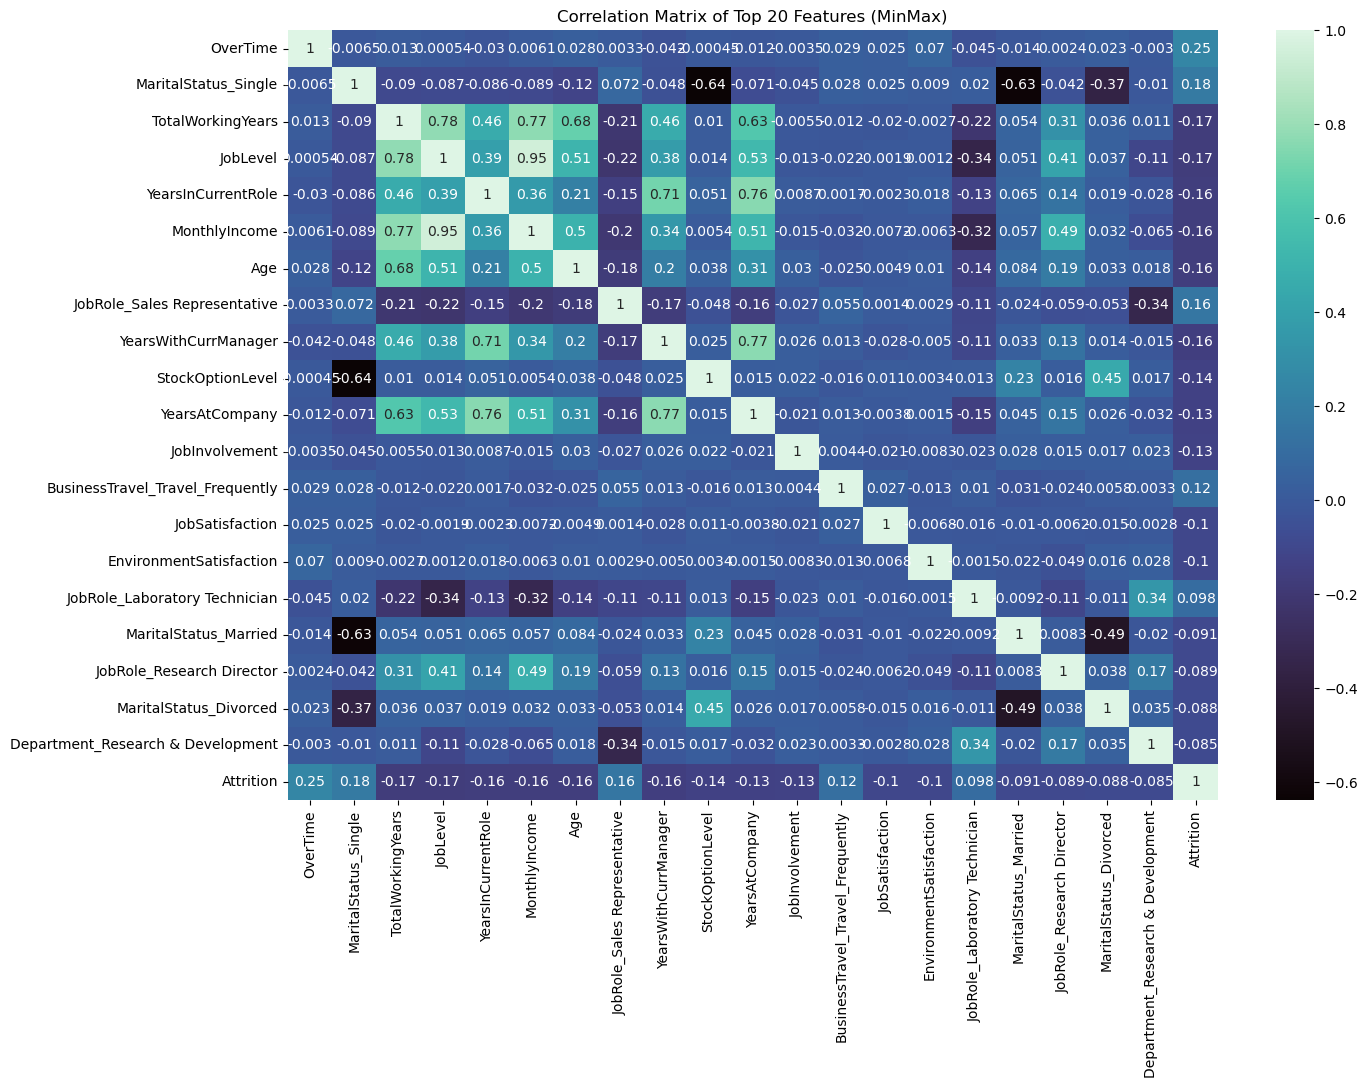

In [34]:
corr_with_target_df = corr_minmax_series.reset_index()
corr_with_target_df.columns = ['Feature', 'Correlation'] # Give the columns names

plot_barchart(corr_with_target_df=corr_with_target_df)

corr_matrix_minmax = pd.concat([features_minmax[top_corr_minmax_series.index], labels], axis=1).corr()
plot_heatmap(corr_matrix_minmax, 'Correlation Matrix of Top 20 Features (MinMax)')

### Standard Scaled Data

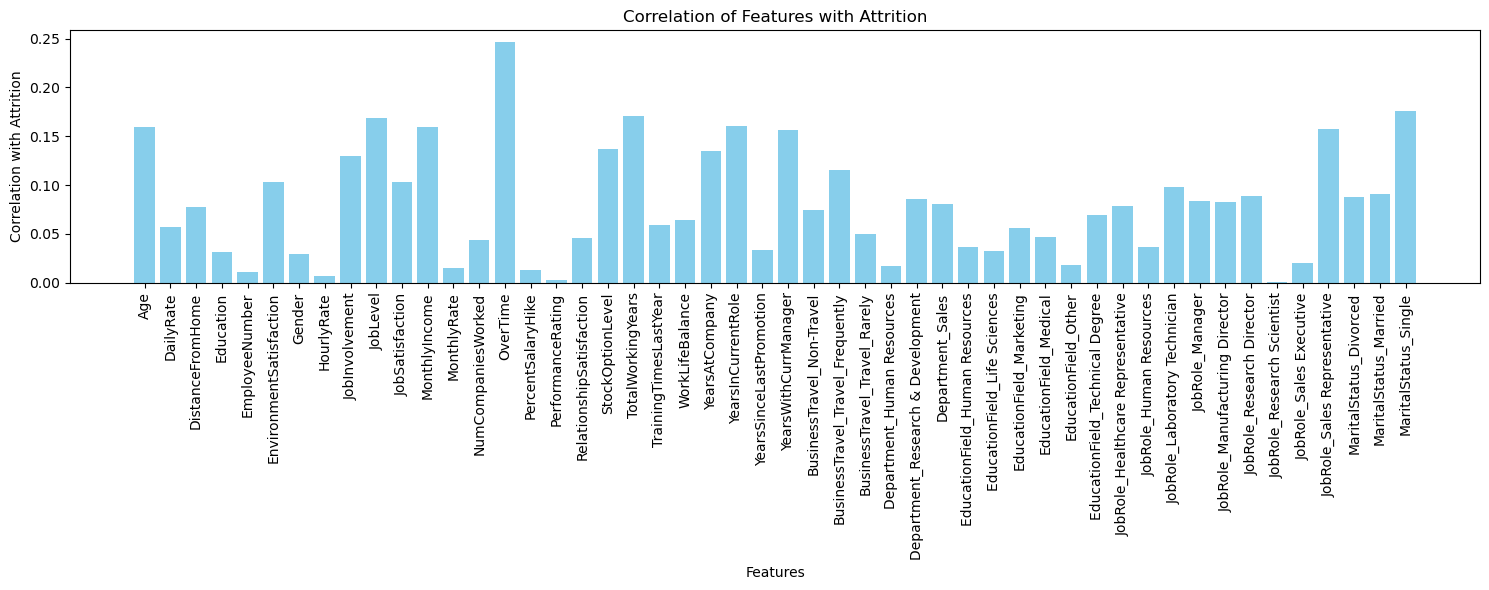

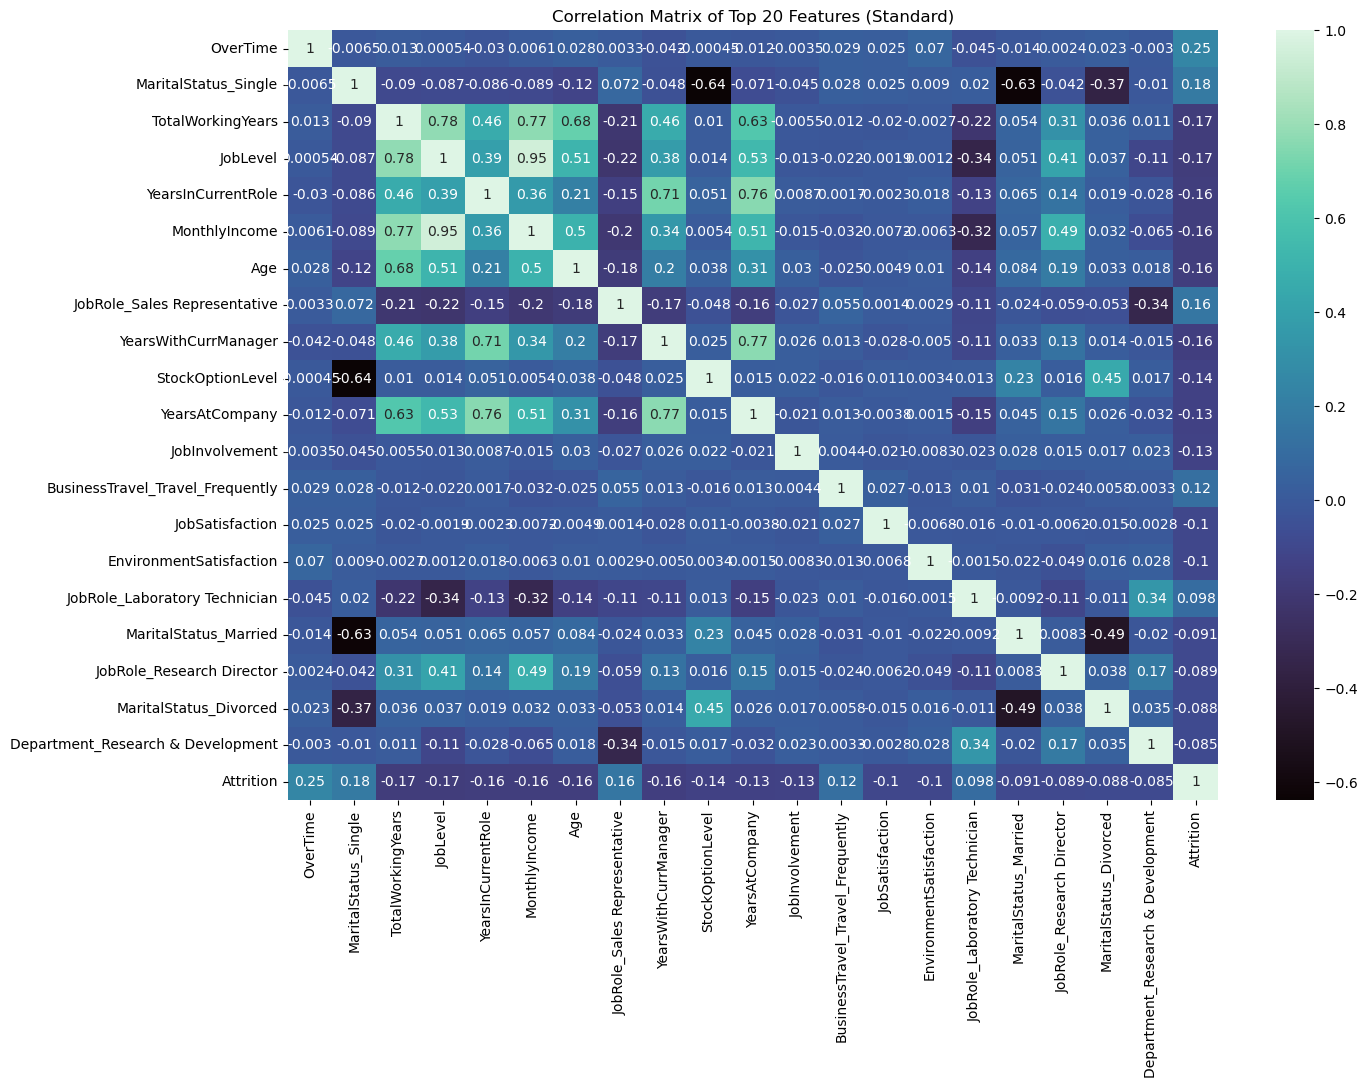

In [35]:
corr_with_target_df = corr_standard_series.reset_index()
corr_with_target_df.columns = ['Feature', 'Correlation'] # Give the columns names

plot_barchart(corr_with_target_df=corr_with_target_df)

corr_matrix_standard = pd.concat([features_standard[top_corr_minmax_series.index], labels], axis=1).corr()
plot_heatmap(corr_matrix_standard, 'Correlation Matrix of Top 20 Features (Standard)')

## 1D Scatter Plot

Class: OverTime, Attrition (NO): 1233
Class: OverTime, Attrition (YES): 237


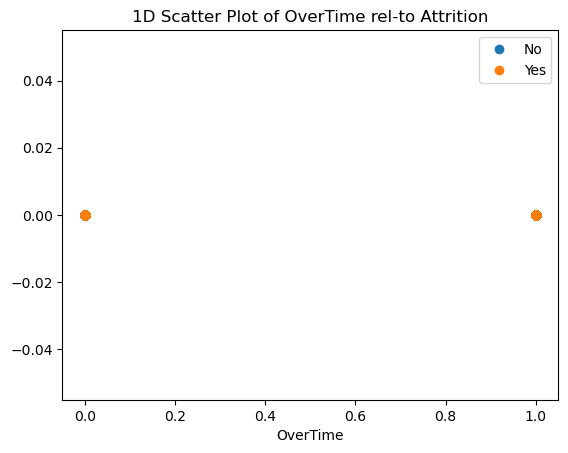

Class: MaritalStatus_Single, Attrition (NO): 1233
Class: MaritalStatus_Single, Attrition (YES): 237


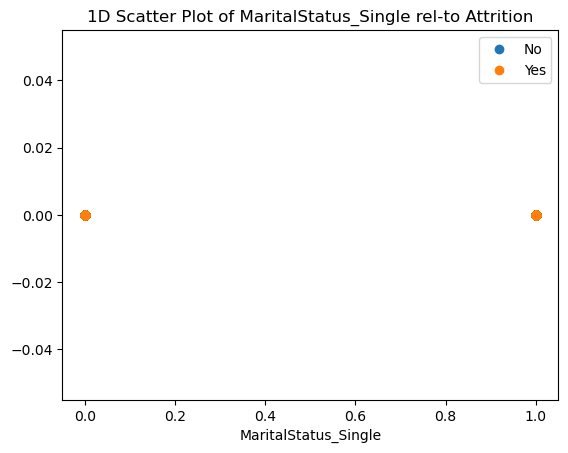

Class: TotalWorkingYears, Attrition (NO): 1233
Class: TotalWorkingYears, Attrition (YES): 237


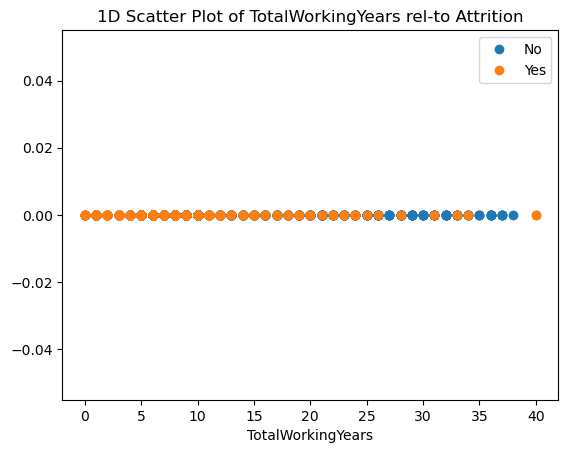

Class: JobLevel, Attrition (NO): 1233
Class: JobLevel, Attrition (YES): 237


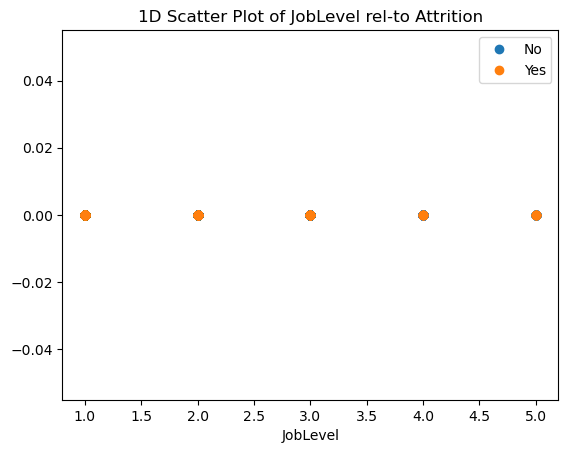

Class: YearsInCurrentRole, Attrition (NO): 1233
Class: YearsInCurrentRole, Attrition (YES): 237


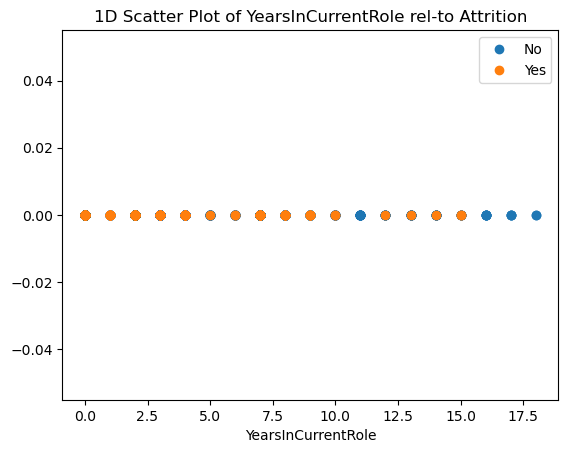

Class: MonthlyIncome, Attrition (NO): 1233
Class: MonthlyIncome, Attrition (YES): 237


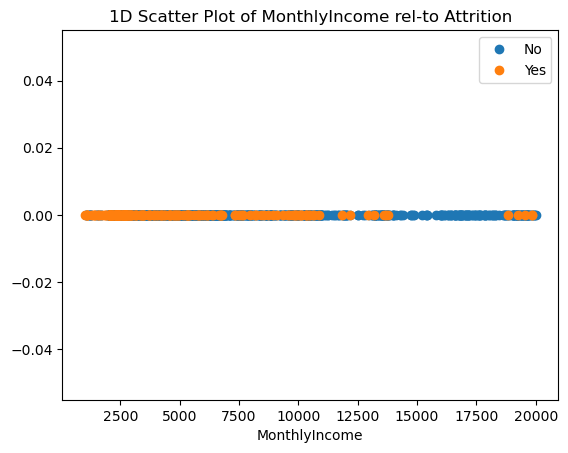

Class: Age, Attrition (NO): 1233
Class: Age, Attrition (YES): 237


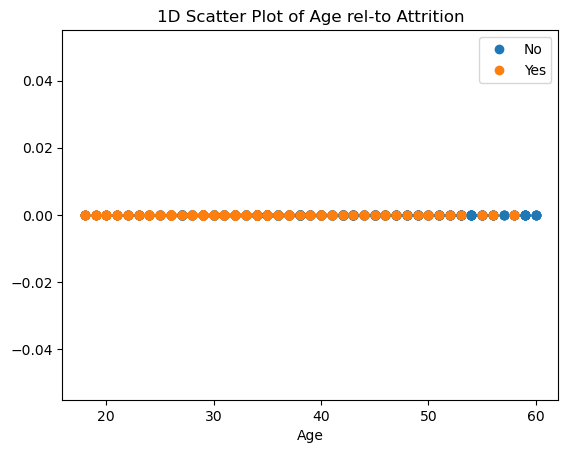

Class: JobRole_Sales Representative, Attrition (NO): 1233
Class: JobRole_Sales Representative, Attrition (YES): 237


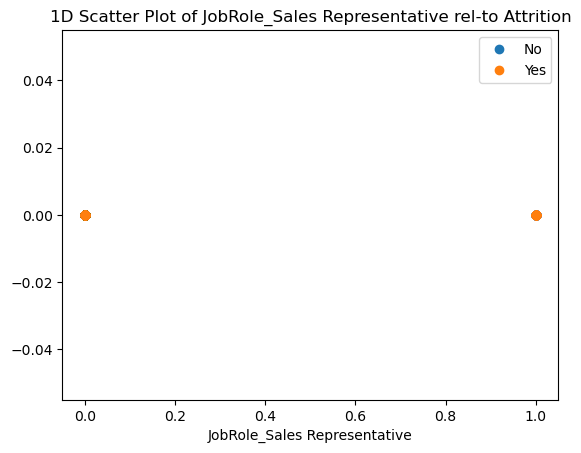

Class: YearsWithCurrManager, Attrition (NO): 1233
Class: YearsWithCurrManager, Attrition (YES): 237


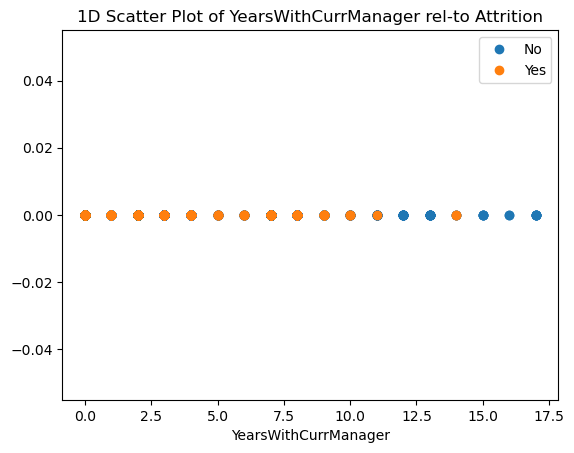

Class: StockOptionLevel, Attrition (NO): 1233
Class: StockOptionLevel, Attrition (YES): 237


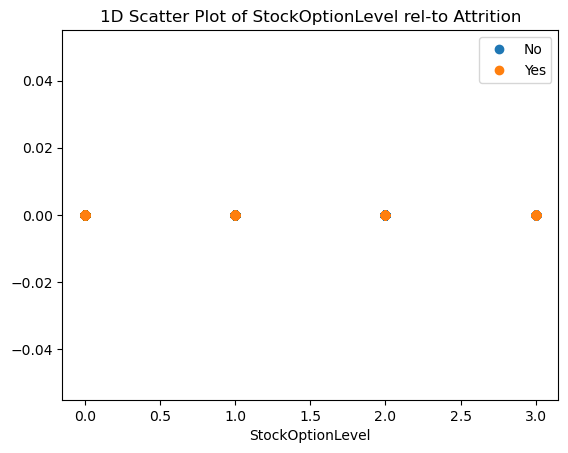

Class: YearsAtCompany, Attrition (NO): 1233
Class: YearsAtCompany, Attrition (YES): 237


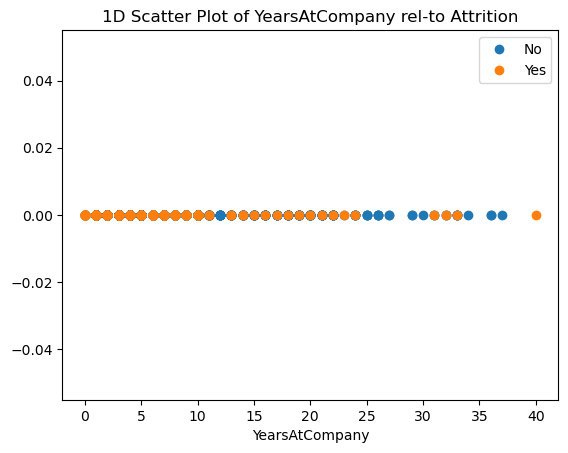

Class: JobInvolvement, Attrition (NO): 1233
Class: JobInvolvement, Attrition (YES): 237


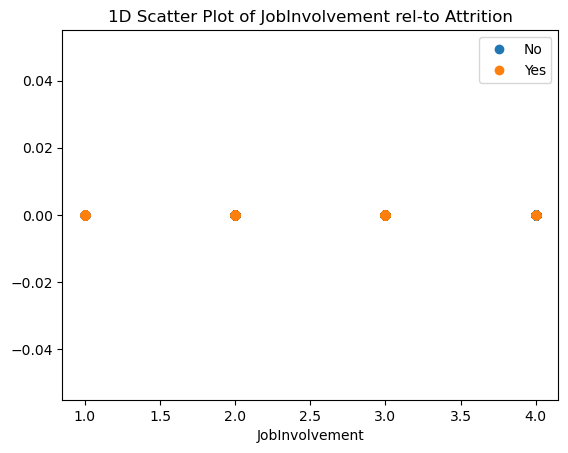

Class: BusinessTravel_Travel_Frequently, Attrition (NO): 1233
Class: BusinessTravel_Travel_Frequently, Attrition (YES): 237


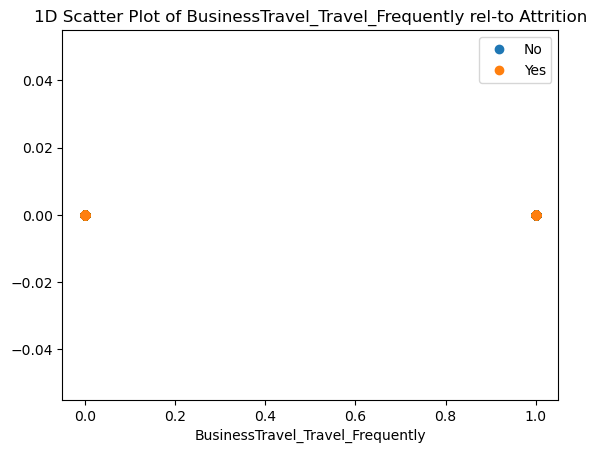

Class: JobSatisfaction, Attrition (NO): 1233
Class: JobSatisfaction, Attrition (YES): 237


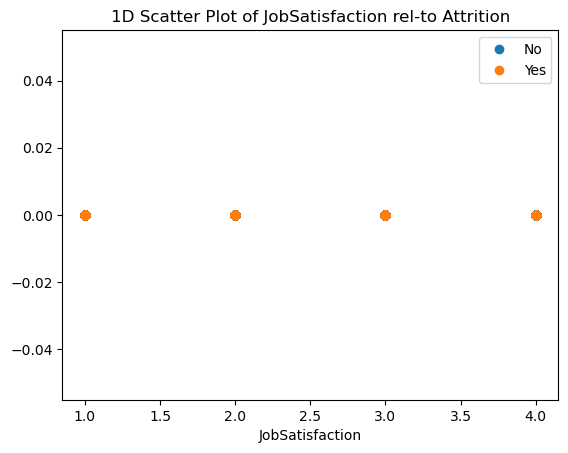

Class: EnvironmentSatisfaction, Attrition (NO): 1233
Class: EnvironmentSatisfaction, Attrition (YES): 237


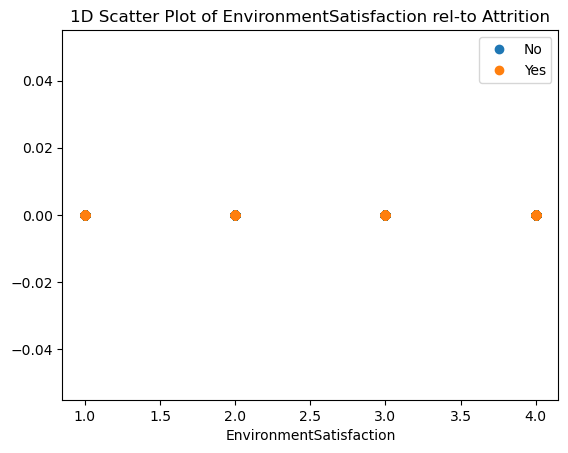

Class: JobRole_Laboratory Technician, Attrition (NO): 1233
Class: JobRole_Laboratory Technician, Attrition (YES): 237


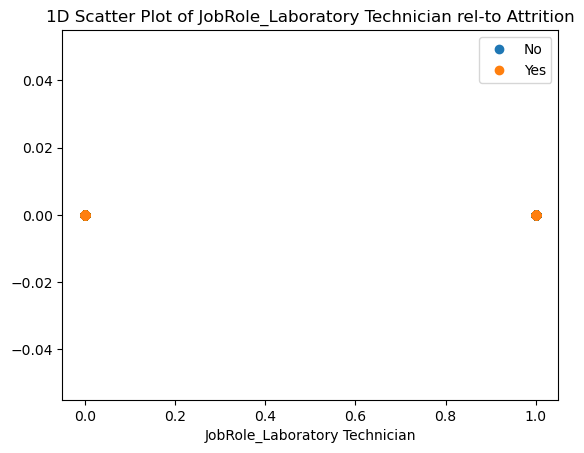

Class: MaritalStatus_Married, Attrition (NO): 1233
Class: MaritalStatus_Married, Attrition (YES): 237


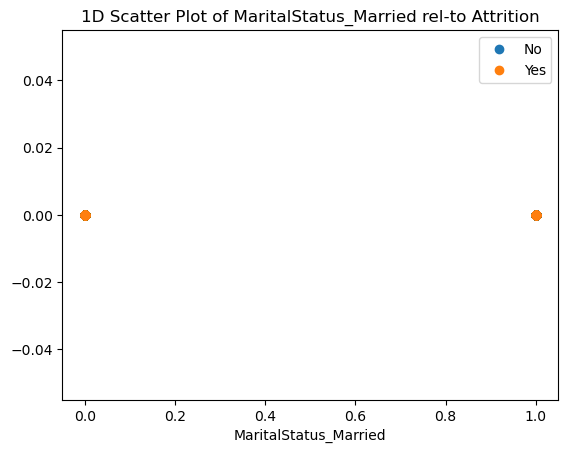

Class: JobRole_Research Director, Attrition (NO): 1233
Class: JobRole_Research Director, Attrition (YES): 237


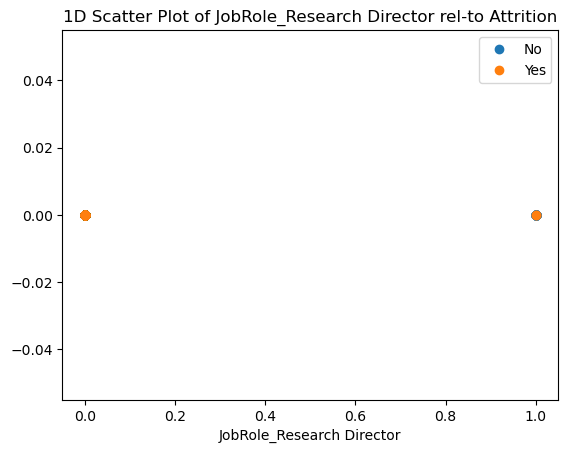

Class: MaritalStatus_Divorced, Attrition (NO): 1233
Class: MaritalStatus_Divorced, Attrition (YES): 237


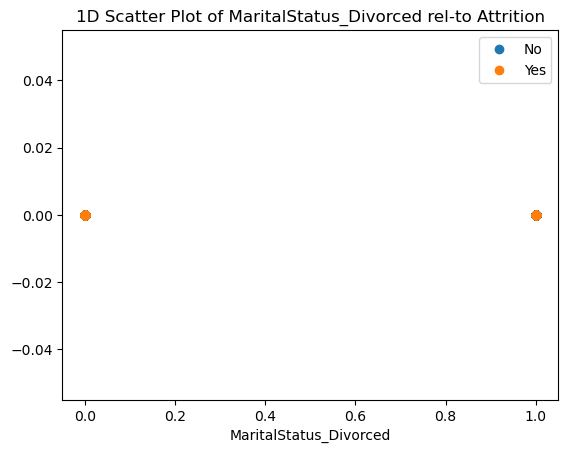

Class: Department_Research & Development, Attrition (NO): 1233
Class: Department_Research & Development, Attrition (YES): 237


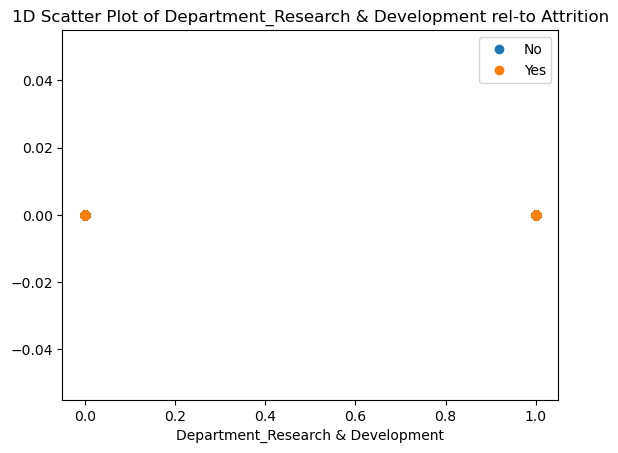

In [36]:
import numpy as np

class_No = features.loc[labels["Attrition"] == 0]
class_Yes = features.loc[labels["Attrition"] == 1]

# # Create a 1D scatter plot for sepal_width with numeric labels
for key, _ in top_corr_minmax_series.items(): # Correlation value is not required here
    print(f'Class: {key}, Attrition (NO): {len(class_No[key])}')
    print(f'Class: {key}, Attrition (YES): {len(class_Yes[key])}')
    plt.plot(class_No[key], np.zeros(shape=class_No[key].shape), 'o', label='No')
    plt.plot(class_Yes[key], np.zeros(shape=class_Yes[key].shape), 'o', label='Yes')

    plt.legend()
    plt.xlabel(key)
    plt.title(f'1D Scatter Plot of {key} rel-to Attrition')
    plt.show()

## Validating the Pipeline

In [37]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def accuracy(featuresdf, labelsdf, scale_type):
    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_standard, labels["Attrition"], test_size=0.2, random_state=42)
    # Step 2: Initialize the Logistic Regression classifier
    clf = LogisticRegression()
    # Step 3: Train the classifier on the training data
    clf.fit(X_train, y_train)
    # Step 4: Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Step 5: Evaluate the classifier's performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy\nUsing scaling {scale_type}: {accuracy*100:.6f} %")

In [38]:
accuracy(features_minmax, labels, 'minmax')
accuracy(features_standard, labels, 'standard')

Accuracy
Using scaling minmax: 89.115646 %
Accuracy
Using scaling standard: 88.435374 %
